In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.datasets import load_iris, load_breast_cancer
from scipy.stats import kurtosis
from sklearn.metrics import mean_squared_error

# Load datasets
iris = load_iris()
iris_data = iris.data
iris_target = iris.target

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_target = cancer.target


In [23]:
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data, pca

iris_pca, iris_pca_model = apply_pca(iris_data)
cancer_pca, cancer_pca_model = apply_pca(cancer_data)


In [24]:
def apply_ica(data, n_components=2):
    ica = FastICA(n_components=n_components)
    transformed_data = ica.fit_transform(data)
    return transformed_data, ica

iris_ica, iris_ica_model = apply_ica(iris_data)
cancer_ica, cancer_ica_model = apply_ica(cancer_data)


In [25]:
def apply_random_proj(data, n_components=2):
    rp = GaussianRandomProjection(n_components=n_components)
    transformed_data = rp.fit_transform(data)
    return transformed_data, rp

iris_rp, iris_rp_model = apply_random_proj(iris_data)
cancer_rp, cancer_rp_model = apply_random_proj(cancer_data)


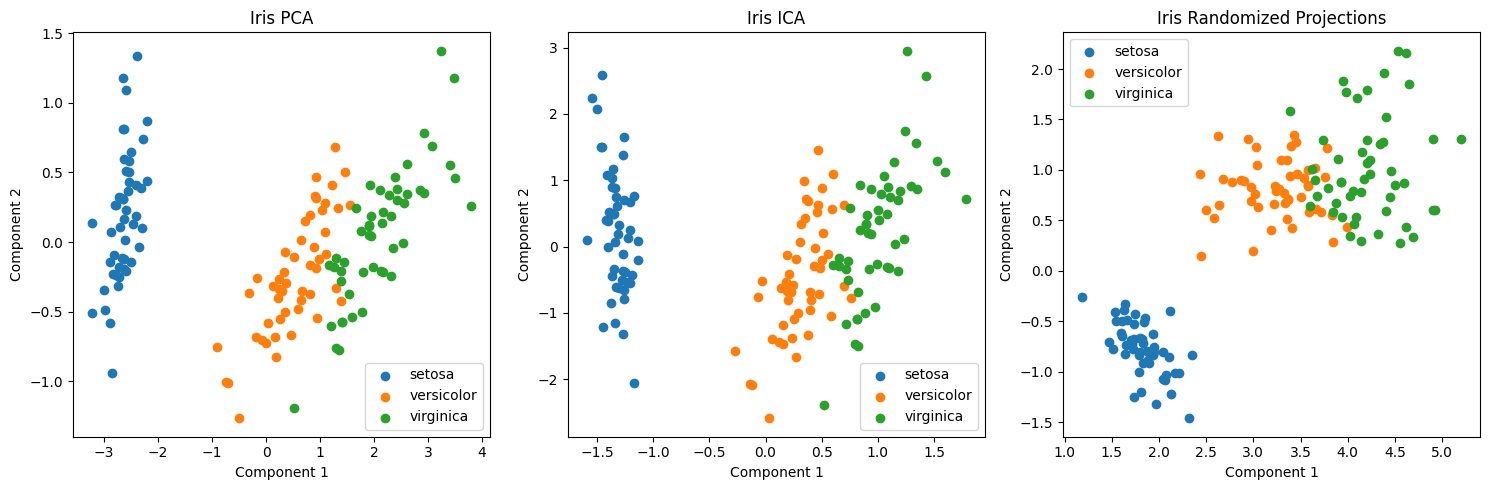

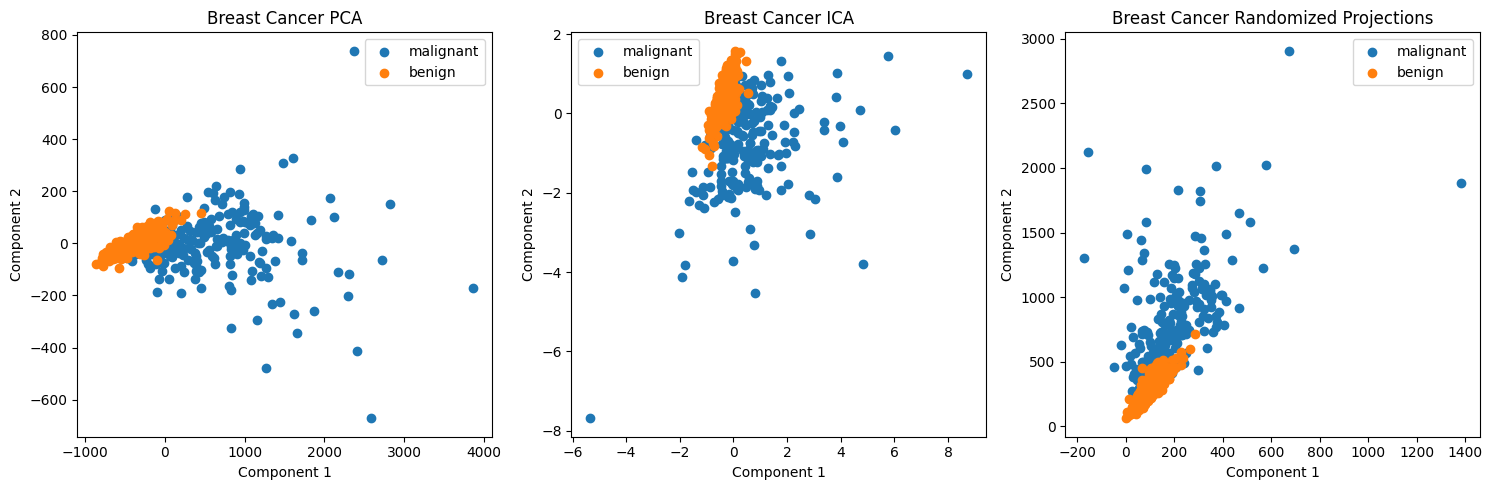

In [26]:
import matplotlib.pyplot as plt

def plot_transformed_data(transformed_data_list, target, titles, target_names):
    fig, axs = plt.subplots(1, len(transformed_data_list), figsize=(15, 5))
    for i, transformed_data in enumerate(transformed_data_list):
        for t in np.unique(target):
            axs[i].scatter(transformed_data[target == t, 0], transformed_data[target == t, 1], label=target_names[t])
        axs[i].set_title(titles[i])
        axs[i].set_xlabel('Component 1')
        axs[i].set_ylabel('Component 2')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

# Plotting for Iris dataset
iris_transformed_data = [iris_pca, iris_ica, iris_rp]
iris_titles = ["Iris PCA", "Iris ICA", "Iris Randomized Projections"]
plot_transformed_data(iris_transformed_data, iris_target, iris_titles, iris.target_names)

# Plotting for Breast Cancer dataset
cancer_transformed_data = [cancer_pca, cancer_ica, cancer_rp]
cancer_titles = ["Breast Cancer PCA", "Breast Cancer ICA", "Breast Cancer Randomized Projections"]
cancer_target_names = ['malignant', 'benign']  # Breast Cancer target names
plot_transformed_data(cancer_transformed_data, cancer_target, cancer_titles, cancer_target_names)


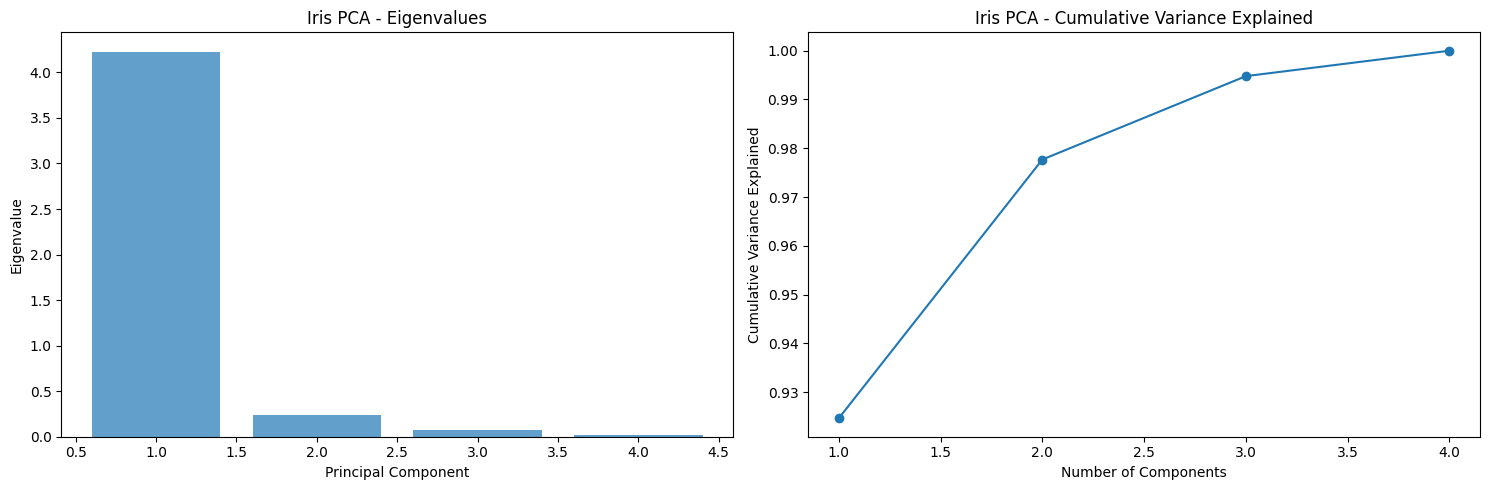

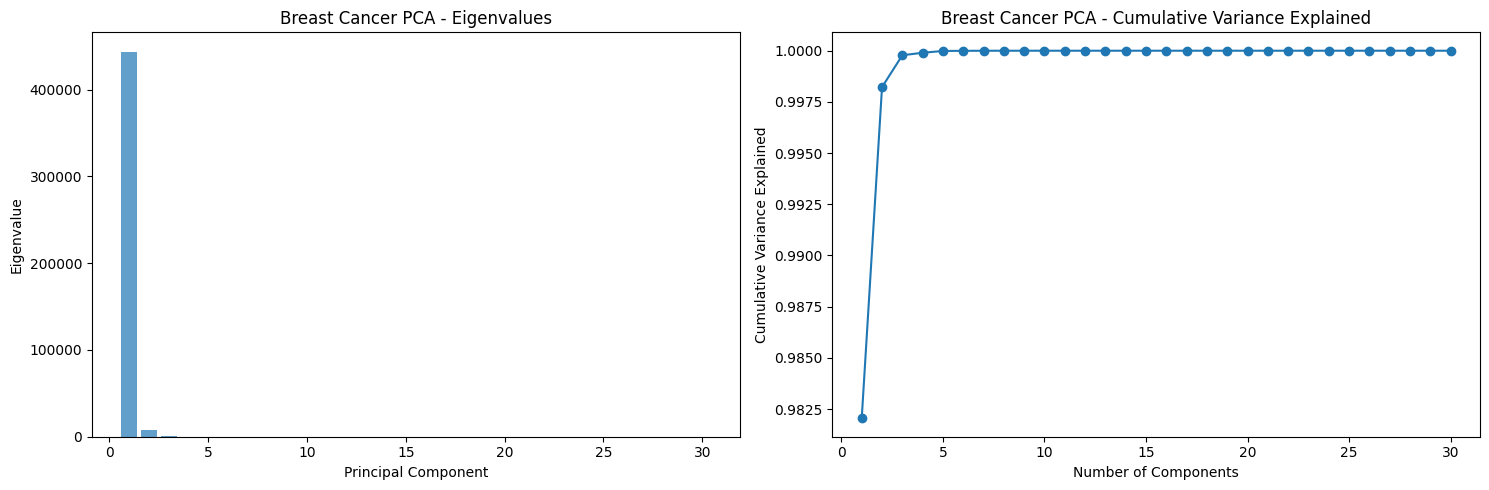

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_eigenvalue_distribution(pca_model, title):
    eigenvalues = pca_model.explained_variance_
    cumulative_variance = np.cumsum(pca_model.explained_variance_ratio_)

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the eigenvalues
    axs[0].bar(range(1, len(eigenvalues) + 1), eigenvalues, alpha=0.7)
    axs[0].set_xlabel('Principal Component')
    axs[0].set_ylabel('Eigenvalue')
    axs[0].set_title(f'{title} - Eigenvalues')

    # Plot the cumulative variance explained
    axs[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
    axs[1].set_xlabel('Number of Components')
    axs[1].set_ylabel('Cumulative Variance Explained')
    axs[1].set_title(f'{title} - Cumulative Variance Explained')

    plt.tight_layout()
    plt.show()

# Apply PCA with all components for full eigenvalue distribution
iris_pca_full = PCA().fit(iris_data)
cancer_pca_full = PCA().fit(cancer_data)

plot_pca_eigenvalue_distribution(iris_pca_full, "Iris PCA")
plot_pca_eigenvalue_distribution(cancer_pca_full, "Breast Cancer PCA")

In [28]:
import numpy as np
from sklearn.decomposition import FastICA
from scipy.stats import kurtosis

# Function to apply ICA and calculate kurtosis
def calculate_ica_kurtosis(data, n_components=2):
    ica = FastICA(n_components=n_components)
    transformed_data = ica.fit_transform(data)
    kurt_values = kurtosis(transformed_data, axis=0)
    return kurt_values, transformed_data

# Calculate kurtosis for Iris dataset
iris_ica_kurtosis, iris_ica_transformed = calculate_ica_kurtosis(iris_data)
print("Iris ICA Kurtosis:", iris_ica_kurtosis)

# Calculate kurtosis for Breast Cancer dataset
cancer_ica_kurtosis, cancer_ica_transformed = calculate_ica_kurtosis(cancer_data)
print("Breast Cancer ICA Kurtosis:", cancer_ica_kurtosis)

Iris ICA Kurtosis: [ 0.16237649 -1.41847638]
Breast Cancer ICA Kurtosis: [18.31519777  7.61099197]


In [29]:
pd.DataFrame(iris_data).describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
pd.DataFrame(cancer_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [38]:
import numpy as np
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import mean_squared_error

def apply_random_proj(data, n_components=2):
    rp = GaussianRandomProjection(n_components=n_components, compute_inverse_components=True)
    transformed_data = rp.fit_transform(data)
    return transformed_data, rp

def reconstruct_data(rp_model, transformed_data):
    # Reconstruct the data using the inverse components
    # print(transformed_data.shape)
    # print(rp_model.inverse_components_.shape)
    reconstructed_data = transformed_data @ rp_model.inverse_components_.T
    return reconstructed_data

def calculate_reconstruction_error(original_data, reconstructed_data):
    return mean_squared_error(original_data, reconstructed_data)


In [41]:
def evaluate_random_proj(data, n_components=2, n_runs=10):
    errors = []
    for _ in range(n_runs):
        transformed_data, rp_model = apply_random_proj(data, n_components)
        reconstructed_data = reconstruct_data(rp_model, transformed_data)
        error = calculate_reconstruction_error(data, reconstructed_data)
        errors.append(error)
    return errors

# Evaluate for Iris dataset
iris_errors = evaluate_random_proj(iris_data, n_components=2, n_runs=10)
print("Iris Reconstruction Errors (Random Projections):", iris_errors)
print("Iris Mean Reconstruction Error:", np.mean(iris_errors))
print("Iris Std Dev of Reconstruction Errors:", np.std(iris_errors))

# Evaluate for Breast Cancer dataset
cancer_errors = evaluate_random_proj(cancer_data, n_components=2, n_runs=10)
print("Breast Cancer Reconstruction Errors (Random Projections):", cancer_errors)
print("Breast Cancer Mean Reconstruction Error:", np.mean(cancer_errors))
print("Breast Cancer Std Dev of Reconstruction Errors:", np.std(cancer_errors))


Iris Reconstruction Errors (Random Projections): [13.996861321483312, 4.102294143273081, 6.839799307844576, 3.345535554153896, 3.6639099951728205, 6.482152089723483, 5.860248836765848, 11.740894443512675, 15.09673890516624, 5.9925795637301285]
Iris Mean Reconstruction Error: 7.712101416082605
Iris Std Dev of Reconstruction Errors: 4.091546292234585
Breast Cancer Reconstruction Errors (Random Projections): [52700.85973385294, 49637.37519745332, 55035.569339752794, 52937.957998989186, 54579.502570170516, 48443.02607361013, 54462.21456027039, 53959.72318641446, 50565.97189890171, 55506.296021045804]
Breast Cancer Mean Reconstruction Error: 52782.84965804613
Breast Cancer Std Dev of Reconstruction Errors: 2315.136535716276


In [42]:
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd

# Load datasets
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(iris_data, columns=iris.feature_names)

cancer = load_breast_cancer()
cancer_data = cancer.data
cancer_df = pd.DataFrame(cancer_data, columns=cancer.feature_names)

# Calculate the rank of the data
iris_rank = np.linalg.matrix_rank(iris_data)
cancer_rank = np.linalg.matrix_rank(cancer_data)

print("Rank of Iris dataset:", iris_rank)
print("Rank of Breast Cancer dataset:", cancer_rank)


Rank of Iris dataset: 4
Rank of Breast Cancer dataset: 30


In [43]:
# Calculate correlation matrices
iris_corr_matrix = iris_df.corr()
cancer_corr_matrix = cancer_df.corr()

print("Iris Correlation Matrix:")
print(iris_corr_matrix)

print("Breast Cancer Correlation Matrix:")
print(cancer_corr_matrix)


Iris Correlation Matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  
Breast Cancer Correlation Matrix:
                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357     

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

iris_vif = calculate_vif(iris_df)
cancer_vif = calculate_vif(cancer_df)

print("Iris VIF:")
print(iris_vif)

print("Breast Cancer VIF:")
print(cancer_vif)

Iris VIF:
             feature         VIF
0  sepal length (cm)  262.969348
1   sepal width (cm)   96.353292
2  petal length (cm)  172.960962
3   petal width (cm)   55.502060
Breast Cancer VIF:
                    feature           VIF
0               mean radius  63306.172036
1              mean texture    251.047108
2            mean perimeter  58123.586079
3                 mean area   1287.262339
4           mean smoothness    393.398166
5          mean compactness    200.980354
6            mean concavity    157.855046
7       mean concave points    154.241268
8             mean symmetry    184.426558
9    mean fractal dimension    629.679874
10             radius error    236.665738
11            texture error     24.675367
12          perimeter error    211.396334
13               area error     72.466468
14         smoothness error     26.170243
15        compactness error     44.919651
16          concavity error     33.244099
17     concave points error     53.698656
18      